In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as mpl
from sklearn import tree


In [2]:
titanic_data=pd.read_csv(r'C:\Users\pavsokol\Desktop\3331\Kaggle Titanic\train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X=titanic_data.drop(['PassengerId','Name','Survived','Ticket','Cabin'],axis=1)
#Отибраем самые очевидные переменные,которые будем исопльзовать для обучения модели в переменную x
#Дропаем ненужные колонки axis=1 означанет что дропаем именно колонки, если бы был axis=0 значит дропали бы строки

In [6]:
y=titanic_data.Survived
#создаем переменную y, это та переменная которую мы будем предсказывать



In [7]:
X.head()
#Так как у нас присутствуют переменные не числовые, а библиотека сакет лерн может работать только с числовыми переменными
#нам необходимо преобразовать все буквенные переменные в числовые

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
X=pd.get_dummies(X)
X.head()
#Кодируем все буквенные переменные в числовой формат 0 или 1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X=X.fillna({'Age':X.Age.median()})
#Здесь мы заполняем пустые клетки возраста  медианым значением возраста, потому что дерево решений не может работать с пропусками

In [10]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
clf.fit(X,y)
#Передаем в дерево наши значения Х и У

DecisionTreeClassifier(criterion='entropy')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.33, random_state=42)

#Тестовое множество для х_тест и у_тест составит 33% так как тест_сайз и показывает какой процент из выборки мы будем братть
# для теста

In [14]:
X_train.shape
#Проверям сколько % от исходного массива убарнно

(596, 10)

In [15]:
clf.score(X,y)
#В 97% случаев мы правильно классифицируем ответ в трейн выборке

0.9797979797979798

In [16]:
clf.fit(X_train,y_train)
#Обучаем нашу выборку на срезе который задали в train_test_split

DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.score(X_train,y_train)
#Проверяем точность классификации на обучающем множестве

0.9798657718120806

In [18]:
clf.score(X_test,y_test)
#Проверяем какое качество классификации на тех данных, которые наш классификатор не видел
#Эти данные как раз и есть тот срез из 33%

0.7796610169491526

In [19]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#Наше дерево является переобученным, поэтому введем ограничение на максимальную глубине в 3

In [20]:
clf.fit(X_train,y_train)
#Обучаем наш классификатор на тех же 70% данных, но уже с макс. глубиной дерево 5

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
clf.score(X_train,y_train)
#Здесь на трейне выборках классификатор стал работать хуже, но это не означает, что на тестовых выборках он будет работать тоже хуже

0.8238255033557047

In [22]:
clf.score(X_test,y_test)
# На данных, которые наш классификатор не видел он стал работать лучше!

0.8203389830508474

In [23]:
max_depth_values = range(1,100)

In [24]:
scores_data=pd.DataFrame()

In [25]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    temp_score_data=pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score]})
    scores_data=scores_data.append(temp_score_data)
#Создаем цикл который проверяет, какой глубины дерево необходимо обучить, для этого заранее создали массив от 1 до 100.
#И сохраняем значения скоров в отдельный датаФрейм

In [26]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [27]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'], value_vars=['train_score', 'test_score'],var_name='set_type', value_name='score')
#Преобрзауем датафрейм 

In [28]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


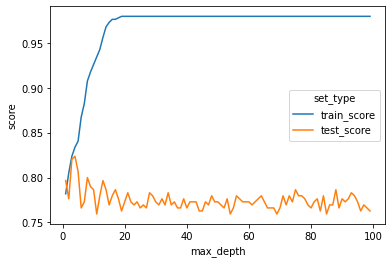

In [29]:
sns.lineplot(x='max_depth',y='score',hue='set_type',data=scores_data_long);

In [30]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [35]:
cross_val_score(clf, X_train, y_train, cv=5)
#Точность классификатора который разбил наши значения на 5 равных частей и сравнил их между собой

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [34]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [33]:
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rf=RandomForestClassifier()

In [39]:
parametrs={'n_estimators':[10,12,14,13,15,16,18,20,22,25], 'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid_search_cv_clf=GridSearchCV(clf_rf,parametrs,cv=5)

In [43]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 12, 14, 13, 15, 16, 18, 20, 22,
                                          25]})

In [45]:
grid_search_cv_clf.best_params_

{'max_depth': 8, 'n_estimators': 18}

In [48]:
best_clf=grid_search_cv_clf.best_estimator_

In [49]:
best_clf.score(X_test, y_test)

0.8

In [57]:
model = RandomForestClassifier(n_estimators=18, max_depth=8, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [55]:
X_test2=pd.read_csv(r'C:\Users\pavsokol\Desktop\3331\test.csv')

In [85]:
X_test3=X_test2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [86]:
X_test3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [87]:
X_test3=pd.get_dummies(X_test3)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [88]:
X_test4=X_test3.fillna({'Age':X_test3.Age.median()})

In [89]:
X_test4.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [92]:
X_test4=X_test4.fillna({'Fare':12})


In [91]:
model = RandomForestClassifier(n_estimators=18, max_depth=8, random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test4)

In [93]:
out=pd.DataFrame({'PassengerID' : X_test2.PassengerId, 'Survived' : pred})

In [94]:
out.to_csv('my_submission.csv', index=False)

In [95]:
import os
print(os.getcwd())

C:\Users\pavsokol\Desktop\3331\Kaggle Titanic
